# CS 267A - Homework 2
## Peter Racioppo
## April 24, 2020

## Problem 6
### Programming Exercise: Implement a sampler

### Let X = {X1, X2, ..., Xn} be a collection of n independent Boolean random variables, with each vari- able Xi being true with probability pi, and false with probability 1 − pi. Let ∆ be a CNF which uses {X1, X2, ..., Xn} as its atoms.
### Then, we can interpret ∆ as a random variable with the following conditional distribution, where x is an assignment to each variable in X:

### Pr(∆ = true|X = x) = 0 = 1 if x is a satisfying assignment to ∆ , and 0 otherwise (1).

### For this problem, you will be computing the marginal probability Pr(∆ = true), from the joint distribution Pr(∆, X1 , X2 , ..., Xn ). Intuitively, this is the probability that ∆ is satisfied if we randomly draw assignments to the X variables according to specified distributions.

## Part B: Write a Sampler
### For this question, you will be implementing a method to approximate the probability P (∆ = true). To do this, you will use a Monte-Carlo sampler. You will not need to turn in your code; we will only ask for the output of your program.
### A Monte-Carlo sampler estimates a probability by randomly drawing many samples. For example, imagine we have a mysterious coin which lands on heads with some unknown probability p. We can flip the coin as many times as we want, but we can’t directly observe p. We can estimate p by simply flipping the coin n times, with the estimate getting more accurate as n increases. Imagine we flip the coin 4 times and get {heads, heads, tails, heads}. Then, we can guess that p = 34 based on the proportion of times that we see heads in this finite set.
### We want to apply Monte-Carlo sampling to our problem of estimating the probability that ∆ is satisfied. Formally, we want you to implement a function which performs the following task:

### Input:
### 1. A CNF ∆, specified as a list of lists of integers, where a positive integer is a positive literal and a negative integer is a negated literal (just like the CNF from last homework).
### Example: ∆ = [[1, −2], [−1, 2]].
### 2. Probabilities: A map w from each variable to its probability of being true. You can implement this as a dictionary.
### Example: w = [(1 → 0.5), (2 → 0.9)] says variable 1 is true with probability 0.5, and variable 2 is true with probability 0.9.
### 3. n, the number of samples to draw.
### Output:
### The approximate probability that Pr(∆ = true) if we randomly draw n samples according to the distribution specified by w.

### We recommend you solve this problem by implementing the following helper methods:
### Draw Sample: A method which draws a random assignment to variables according to a specified weight function w.
### Substitution: A method which substitutes the value of each sampled variable into ∆, and computes whether or not ∆ is satisfied under this assignment.

In [124]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [82]:
# This function takes a Conjuctive Normal Form (CNF) Boolean formula
# and a list of variable truth values, and computes whether the CNF
# is satisfied under this assignment.
def f_Substitute(Delta,Var):
    # Inputs:
    # A CNF Delta
    # A list Var of the True/False values of each variable
    
    Var_n = Var*2 - 1 # Replace 0s in Var with -1s
    L = np.shape(Delta)[0] # Number of conjunctions in Delta
    # Conj_Vals is a list of truth values for each conjunction
    # in the CNF.
    Conj_Vals = np.zeros(L) # Initialize Conj_Vals to zeros
    # Loop through the list of conjunctions:
    for conj_i in np.arange(L):
        conj = Delta[conj_i] # A given conjunction
        # tf is the True/False value of this conjunction:
        tf = 0 # (Initialize to zero)
        # Loop through the elements in a given conjunction:
        for i in conj:
            # If an i is negative this corresponds to a negation.
            # Thus, we multiply the sign of i by the truth value
            # of the corresponding variable. This variable is
            # indexed by abs(i)-1. If any of the disjunctions
            # are satisfied, the conjunction is true, so we set
            # tf = 1 and break. Otherwise, tf = 0, and the
            # conjunction is false.
            if (np.sign(i)*Var_n[np.absolute(i)-1]) == 1:
                tf = 1
                break
        # Add the truth value for a given conjunction
        # to the list Conj_Vals:
        Conj_Vals[conj_i] = tf
        
        # Outputs:
        # 'True' if Conj_Vals contains only 1s
        # 'False' otherwise
    return (np.all(Conj_Vals))

In [119]:
# This function draws a random assignment to variables
# according to a specified weight function w.
def f_Draw_Sample(w):
    # Input: w, a list of probabilities that each variable is true.
    
    # Probabilities must be between 0 and 1:
    if np.min(w) < 0 or np.max(w) > 1:
        print("Invalid probability.")
    
    N = np.size(w) # The number of variables.
    # Var is a list of the True/False values of each variable:
    Var = np.zeros(N) # Initialize to zeros
    # Loop through the variables:
    for i in np.arange(N):
        # Randomly draw 1 or 0, with probability w[i] and 1 - w[i]:
        Var[i] = np.random.choice(np.array((1,0)),p=np.array((w[i],1-w[i])))
        
    # Output: Var, a list of the True/False values of each variable.
    return Var

In [137]:
# This function...
def f_Monte_Carlo_Sampler(Delta,w,n=1000):
    # Inputs:
    # Delta, a CNF
    # w, a list of probabilities that each variable is true.
    # n, the number of samples
    
    # counter counts the number of
    # times the CNF is satisfied:
    counter = 0 # Initialize to zero
    # Sample n times:
    for i in np.arange(n):
        # Randomly draw truth values for each variable,
        # according to the weight vector w:
        Var = f_Draw_Sample(w)
        # Check whether the CNF is satisfied under this
        # assignment and increment the counter.
        counter += f_Substitute(Delta,Var)
        
    # Output:
    # counter/n, the sample mean of the
    # number of times the CNF was satisfied.
    return (counter/n)

In [141]:
# Test:
Delta = [[-1,-2,3],[-1,2,4],[2,3,4],[3,4]]
w = np.array((0.1,0.2,0.5,0.3))

f_Monte_Carlo_Sampler(Delta,w)

0.631

## Part C: Evaluate
### For each of the following, use n = 1000 samples to compute Pr(∆ = true), given the probabilities for each atom. You should report 3 runs for each question.
### 1. (a∨b∨¬c)∧(b∨c∨d∨¬e)∧(¬b∨¬d∨e)∧(¬a∨¬b) with Pr(a)=0.3, Pr(b)=0.6, Pr(c)=0.1, Pr(d)=0.8, Pr(e)=0.4
### 2. (¬a∨c∨d)∧(b∨c∨¬d∨e)∧(¬c∨d∨¬e) with Pr(a) = 0.2, Pr(b) = 0.1, Pr(c) = 0.8, Pr(d) =0.3, Pr(e)=0.5

In [170]:
# [a,b,c,d,e] = [1,2,3,4,5]

Delta1 = [[1,2,-3],[2,3,4,-5],[-2,-4,5],[-1,-2]]
w1 = np.array((0.3,0.6,0.1,0.8,0.4))

for i in np.arange(3):
    print(f_Monte_Carlo_Sampler(Delta1,w1))

0.569
0.548
0.592


In [172]:
Delta2 = [[-1,3,4],[2,3,-4,5],[-3,4,-5]]
w2 = np.array((0.2,0.1,0.8,0.3,0.5))

for i in np.arange(3):
    print(f_Monte_Carlo_Sampler(Delta2,w2))

0.643
0.652
0.657


### Plotting how the estimate of Pr(∆ = true) depends on the number of samples:

In [173]:
# This function computes the Monte Carlo estimate of
# Pr(∆ = true) for a range of sample sizes.
def f_MC_n(Delta,w,order=3):
    # Inputs:
    # Delta, a CNF
    # w, a list of probabilities that each variable is true.
    # order, the max order of the sample size (n <= 10^order)
    
    ep = np.linspace(0,order,order*5+1) # Vector of exponents
    n_vec = 10**ep # Powers of ten
    # Initialize placeholder for estimated probabilities:
    p_vec = np.zeros(np.size(ep))
    
    # Loop through the list of sample sizes:
    for i in np.arange(np.size(ep)):
        # Compute the estimate for each sample size:
        p_vec[i] = f_Monte_Carlo_Sampler(Delta,w,n_vec[i])
    
    # Outputs:
    # n_vec, the sample sizes
    # p_vec, the estimated probabilities
    # for each sample size
    return(n_vec,p_vec)

In [174]:
# This function plots the estimated
# probabilities vs the sample size
def f_Plot(n_vec,p_vec):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.plot(n_vec,p_vec)
    ax.set_xscale('log')
    plt.xlabel('Log Sample Size')
    plt.ylabel('Pr(∆ = true)')
    plt.grid()
    plt.show()

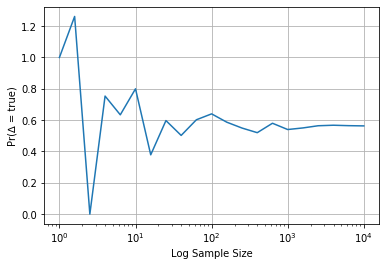

In [176]:
# Run for the first CNF:
n_vec,p_vec = f_MC_n(Delta1,w1,order=4)
f_Plot(n_vec,p_vec)

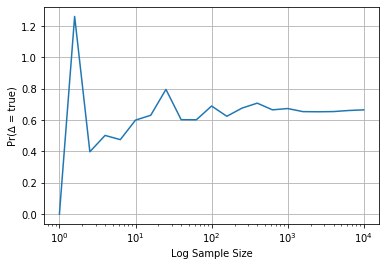

In [177]:
# Run for the second CNF:
n_vec,p_vec = f_MC_n(Delta2,w2,order=4)
f_Plot(n_vec,p_vec)